In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Read the File

In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\fact_orders_aggregate.csv")
df

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0
...,...,...,...,...,...,...
31724,FAUG831121302,789121,30-Aug-22,1,1,1
31725,FAUG831421102,789421,30-Aug-22,1,1,1
31726,FAUG831122203,789122,30-Aug-22,1,1,1
31727,FAUG831303403,789303,30-Aug-22,1,1,1


In [3]:
df1=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\fact_order_lines.csv")
df1

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
57091,FAUG831420303,"Tuesday, August 30, 2022",789420,25891303,24,"Wednesday, August 31, 2022","Tuesday, August 30, 2022",24,1,1,1
57092,FAUG831122303,"Tuesday, August 30, 2022",789122,25891303,67,"Wednesday, August 31, 2022","Wednesday, August 31, 2022",54,0,1,0
57093,FAUG831702303,"Tuesday, August 30, 2022",789702,25891303,41,"Wednesday, August 31, 2022","Tuesday, August 30, 2022",37,0,1,0
57094,FAUG831221503,"Tuesday, August 30, 2022",789221,25891303,92,"Wednesday, August 31, 2022","Wednesday, August 31, 2022",83,0,1,0


In [4]:
df2=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\dim_targets_orders.csv")
df2

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69
5,789101,86,80,69
6,789102,90,81,73
7,789103,92,67,62
8,789121,78,77,60
9,789122,76,65,49


In [5]:
df3=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\dim_products.csv")
df3

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy
5,AM Butter 500,25891203,Dairy
6,AM Ghee 250,25891301,Dairy
7,AM Ghee 150,25891302,Dairy
8,AM Ghee 100,25891303,Dairy
9,AM Curd 250,25891401,Dairy


In [6]:
df4=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\dim_date.csv")
df4

,date,mmm_yy,week_no
0,01-Apr-22,Apr 22,W 14
1,03-Apr-22,Apr 22,W 15
2,04-Apr-22,Apr 22,W 15
3,05-Apr-22,Apr 22,W 15
4,06-Apr-22,Apr 22,W 15
...,...,...,...
178,27-May-22,May 22,W 22
179,28-May-22,May 22,W 22
180,29-May-22,May 22,W 23
181,30-May-22,May 22,W 23


In [7]:
df5=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\dim_customers.csv")
df5

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara
5,789101,Vijay Stores,Surat
6,789102,Vijay Stores,Ahmedabad
7,789103,Vijay Stores,Vadodara
8,789121,Coolblue,Ahmedabad
9,789122,Coolblue,Vadodara


In [8]:
#Converting into proper date formate 
df['order_placement_date']=pd.to_datetime(df['order_placement_date'],format='%d-%b-%y')
df1['order_placement_date']=pd.to_datetime(df1['order_placement_date'])
df1['agreed_delivery_date']=pd.to_datetime(df1['agreed_delivery_date'])
df1['actual_delivery_date']=pd.to_datetime(df1['actual_delivery_date'])
df4['date']=pd.to_datetime(df4['date'],format='%d-%b-%y')



In [9]:
# Join the Table 
df6=df.merge(df5,on='customer_id',how='left')
df6=df6.merge(df2,on='customer_id',how='left')

In [10]:
df6=df6.merge(df1,on=['customer_id','order_id'],how='left',suffixes=('','_line'))
df6=df6.merge(df3,on='product_id',how='left')

In [11]:
df6 = df6.merge(df4.add_prefix("agreed_"), left_on="agreed_delivery_date", right_on="agreed_date", how="left")
df6 = df6.merge(df4.add_prefix("actual_"), left_on="actual_delivery_date", right_on="actual_date", how="left")

In [12]:
df6.head(10)

,order_id,customer_id,order_placement_date,on_time,in_full,otif,customer_name,city,ontime_target%,infull_target%,...,On Time,On Time In Full,product_name,category,agreed_date,agreed_mmm_yy,agreed_week_no,actual_date,actual_mmm_yy,actual_week_no
0,FMR32103503,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Milk 250,Dairy,2022-03-02,Mar 22,W 10,2022-03-02,Mar 22,W 10
1,FMR32103503,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Biscuits 250,Food,2022-03-02,Mar 22,W 10,2022-03-02,Mar 22,W 10
2,FMR32103503,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Butter 100,Dairy,2022-03-02,Mar 22,W 10,2022-03-02,Mar 22,W 10
3,FMR34103403,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Ghee 250,Dairy,2022-03-04,Mar 22,W 10,2022-03-04,Mar 22,W 10
4,FMR34103403,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Curd 50,Dairy,2022-03-04,Mar 22,W 10,2022-03-04,Mar 22,W 10
5,FMR34103403,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Curd 250,Dairy,2022-03-04,Mar 22,W 10,2022-03-04,Mar 22,W 10
6,FMR32103602,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Tea 250,beverages,2022-03-02,Mar 22,W 10,2022-03-01,Mar 22,W 10
7,FMR33103602,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Tea 500,beverages,2022-03-03,Mar 22,W 10,2022-03-03,Mar 22,W 10
8,FMR33103602,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Tea 250,beverages,2022-03-03,Mar 22,W 10,2022-03-03,Mar 22,W 10
9,FMR33103602,789103,2022-03-01,1,0,0,Vijay Stores,Vadodara,92,67,...,1,0,AM Ghee 100,Dairy,2022-03-03,Mar 22,W 10,2022-03-03,Mar 22,W 10


# Here are eightein Feature in the Supply Chain Segmentation  dataset

order_id: Unique ID for each order the customer placed

order_placement_date: It is the date when the customer placed the order

customer_id: Unique ID that is given to each of the customers

product_id: Unique ID that is given to each of the products

order_qty: It is the number of products requested by the customer to be delivered

agreed_delivery_date: It is the date agreed between the customer and AtliQ Mart to deliver the products

actual_delivery_date: It is the actual date AtliQ Mart delivered the product to the customer

delivered_qty: It is the number of products that are actually delivered to the customer

order_id: Unique ID for each order the customer placed

customer_id: Unique ID that is given to each of the customers

order_placement_date: It is the date when the customer placed the order

on_time: '1' denotes the order is delviered on time. '0' denotes the order is not delivered on time.

in_full: '1' denotes the order is delviered in full quantity. '0' denotes the order is not delivered in full quantity.

otif:    '1' denotes the order is delviered both on time and in full quantity. '0' denotes the order is either not delivered on time or not in full quantity



In [13]:
df6.columns

Index(['order_id', 'customer_id', 'order_placement_date', 'on_time', 'in_full',
       'otif', 'customer_name', 'city', 'ontime_target%', 'infull_target%',
       'otif_target%', 'order_placement_date_line', 'product_id', 'order_qty',
       'agreed_delivery_date', 'actual_delivery_date', 'delivery_qty',
       'In Full', 'On Time', 'On Time In Full', 'product_name', 'category',
       'agreed_date', 'agreed_mmm_yy', 'agreed_week_no', 'actual_date',
       'actual_mmm_yy', 'actual_week_no'],
      dtype='object')

In [14]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   57096 non-null  object        
 1   customer_id                57096 non-null  int64         
 2   order_placement_date       57096 non-null  datetime64[ns]
 3   on_time                    57096 non-null  int64         
 4   in_full                    57096 non-null  int64         
 5   otif                       57096 non-null  int64         
 6   customer_name              57096 non-null  object        
 7   city                       57096 non-null  object        
 8   ontime_target%             57096 non-null  int64         
 9   infull_target%             57096 non-null  int64         
 10  otif_target%               57096 non-null  int64         
 11  order_placement_date_line  57096 non-null  datetime64[ns]
 12  prod

In [15]:
# Checking Number of Duplicates
df6.duplicated().sum()

np.int64(0)

**There are no Duplicates in the data set**

In [16]:
# finding missing Values 
df6.isnull().sum()

order_id                       0
customer_id                    0
order_placement_date           0
on_time                        0
in_full                        0
otif                           0
customer_name                  0
city                           0
ontime_target%                 0
infull_target%                 0
otif_target%                   0
order_placement_date_line      0
product_id                     0
order_qty                      0
agreed_delivery_date           0
actual_delivery_date           0
delivery_qty                   0
In Full                        0
On Time                        0
On Time In Full                0
product_name                   0
category                       0
agreed_date                  300
agreed_mmm_yy                300
agreed_week_no               300
actual_date                  441
actual_mmm_yy                441
actual_week_no               441
dtype: int64

**There are lots of missing values** 

In [17]:
df6['agreed_date'].fillna(df6['agreed_date'].median(),inplace=True)
df6['agreed_mmm_yy'].fillna(df6['agreed_mmm_yy'].mode()[0],inplace=True)
df6['agreed_week_no'].fillna(df6['agreed_week_no'].mode()[0],inplace=True)
df6['actual_date'].fillna(df6['agreed_date'].median(),inplace=True)
df6['actual_mmm_yy'].fillna(df6['actual_mmm_yy'].mode()[0],inplace=True)
df6['actual_week_no'].fillna(df6['actual_week_no'].mode()[0],inplace=True)

In [18]:
df6.isnull().sum()

order_id                     0
customer_id                  0
order_placement_date         0
on_time                      0
in_full                      0
otif                         0
customer_name                0
city                         0
ontime_target%               0
infull_target%               0
otif_target%                 0
order_placement_date_line    0
product_id                   0
order_qty                    0
agreed_delivery_date         0
actual_delivery_date         0
delivery_qty                 0
In Full                      0
On Time                      0
On Time In Full              0
product_name                 0
category                     0
agreed_date                  0
agreed_mmm_yy                0
agreed_week_no               0
actual_date                  0
actual_mmm_yy                0
actual_week_no               0
dtype: int64

**There is no missing values now**

In [19]:
df6.to_csv(r'C:\\Users\\LENOVO\\Downloads\\Supply_Chain.csv')

In [20]:
# calculate on daily ON Time , IN FULL ,OTIF% and compare to Targets 
# group by order placement date
daily_metrics=df6.groupby('order_placement_date').agg({'on_time':'mean','in_full':'mean','otif':'mean',
'ontime_target%':'mean','infull_target%':'mean','otif_target%':'mean','order_id':'count'}).reset_index()

for col in ['on_time','in_full','otif']:
    daily_metrics[col]=daily_metrics[col] * 100

metrics_rename = {
    'on_time': 'ON TIME %',
    'in_full': 'IN FULL %',
    'otif': 'OTIF %',
    'ontime_target%': 'ON TIME Target %',
    'infull_target%': 'IN FULL Target %',
    'otif_target%': 'OTIF Target %',
    'order_id': 'Order Count'
}
daily_metrics = daily_metrics.rename(columns=metrics_rename)
print(daily_metrics.head())


  order_placement_date  ON TIME %  IN FULL %     OTIF %  ON TIME Target %  \
0           2022-03-01  69.578313  37.048193  22.891566         85.710843   
1           2022-03-02  73.717949  45.192308  29.807692         86.048077   
2           2022-03-03  71.428571  36.212625  25.913621         85.840532   
3           2022-03-04  77.160494  39.814815  25.308642         86.219136   
4           2022-03-05  73.354232  49.529781  34.796238         86.094044   

   IN FULL Target %  OTIF Target %  Order Count  
0         76.322289      65.484940          332  
1         76.663462      65.993590          312  
2         76.086379      65.362126          301  
3         76.657407      66.123457          324  
4         76.181818      65.648903          319  


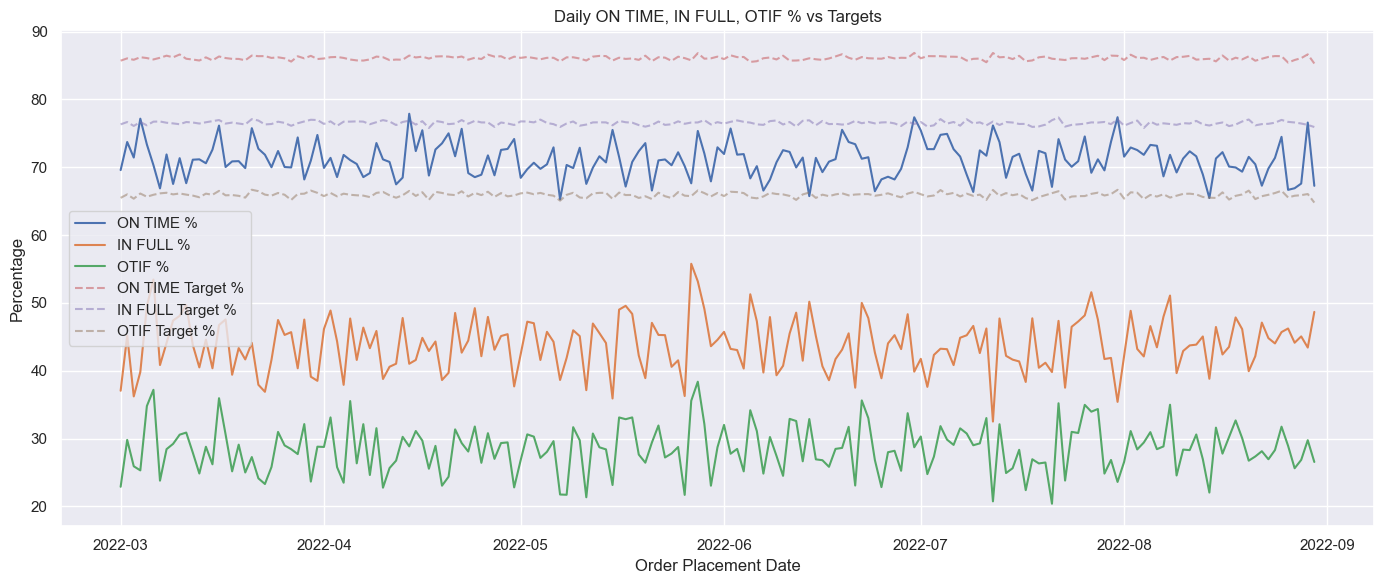

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(daily_metrics['order_placement_date'], daily_metrics['ON TIME %'], label='ON TIME %')
plt.plot(daily_metrics['order_placement_date'], daily_metrics['IN FULL %'], label='IN FULL %')
plt.plot(daily_metrics['order_placement_date'], daily_metrics['OTIF %'], label='OTIF %')
plt.plot(daily_metrics['order_placement_date'], daily_metrics['ON TIME Target %'], '--', label='ON TIME Target %', alpha=0.5)
plt.plot(daily_metrics['order_placement_date'], daily_metrics['IN FULL Target %'], '--', label='IN FULL Target %', alpha=0.5)
plt.plot(daily_metrics['order_placement_date'], daily_metrics['OTIF Target %'], '--', label='OTIF Target %', alpha=0.5)
plt.legend()
plt.title('Daily ON TIME, IN FULL, OTIF % vs Targets')
plt.ylabel('Percentage')
plt.xlabel('Order Placement Date')
plt.tight_layout()
plt.show()

**•	The maximum number of In full Target% is 77.3% in the month of July and only 47.4% of target achieved and the rest is not fulfilled.**

**•	The maximum number of In full % is 55.8% in the month of May and the rest 76.6% and they never reach the targets on time.**

**•	The minimum number of In full Target% is 75.8% in the month of August Only 42.1% of target achieved and the rest is not fulfilled.**

**•	The minimum number of In full % is 32.5% in the month of July and the 76.6% of target is not achieved.**

**•	The maximum number of On Time Target% is 86.85% in the month of June only 77% of target achieved and the rest is not fulfilled.**

**•	The maximum number of On Time % is 77.88% in the month of April and the rest 86.48% and they never reach the targets on time.**

**•	The minimum number of On Time Target% is 62.26% in the month of may only 67% of target achieved and the rest is not fulfilled.**

**•	The minimum number of On Time % is 85.29% in the month of August and the 85.61% of target is not achieved.**

**•	The maximum number of Ofit Target% is 66.68% in the month of march and only 21% of target achieved and the rest is not fulfilled.**

**•	The maximum number of Otif % is 38.38% in the month of May and achieved its target with 66.19% when all the targets are fulfilled.**

**•	The minimum number of Otif Target% is 64.79% in the month of August only 27% of target achieved and the rest is not fulfilled.**

**•	The minimum number of Otif % is 20.39% in the month of July and the 68.18% of target is not achieved.**


In [22]:
# Calculate ON TIME %, IN FULL %, OTIF % by city
city_metrics = df6.groupby('city').agg({
    'on_time': 'mean',
    'in_full': 'mean',
    'otif': 'mean',
    'ontime_target%': 'mean',
    'infull_target%': 'mean',
    'otif_target%': 'mean',
    'order_id': 'count'
}).reset_index()

for col in ['on_time', 'in_full', 'otif']:
    city_metrics[col] = city_metrics[col] * 100

city_metrics = city_metrics.rename(columns={
    'on_time': 'ON TIME %',
    'in_full': 'IN FULL %',
    'otif': 'OTIF %',
    'ontime_target%': 'ON TIME Target %',
    'infull_target%': 'IN FULL Target %',
    'otif_target%': 'OTIF Target %',
    'order_id': 'Order Count'
})

print(city_metrics.head())

        city  ON TIME %  IN FULL %     OTIF %  ON TIME Target %  \
0  Ahmedabad  70.004066  44.831267  28.516975         85.844836   
1      Surat  73.668871  43.705863  29.699585         86.275418   
2   Vadodara  69.910103  42.823577  27.275513         86.179640   

   IN FULL Target %  OTIF Target %  Order Count  
0         77.363336      66.535322        19676  
1         76.938180      66.384206        17842  
2         75.283277      64.885535        19578  


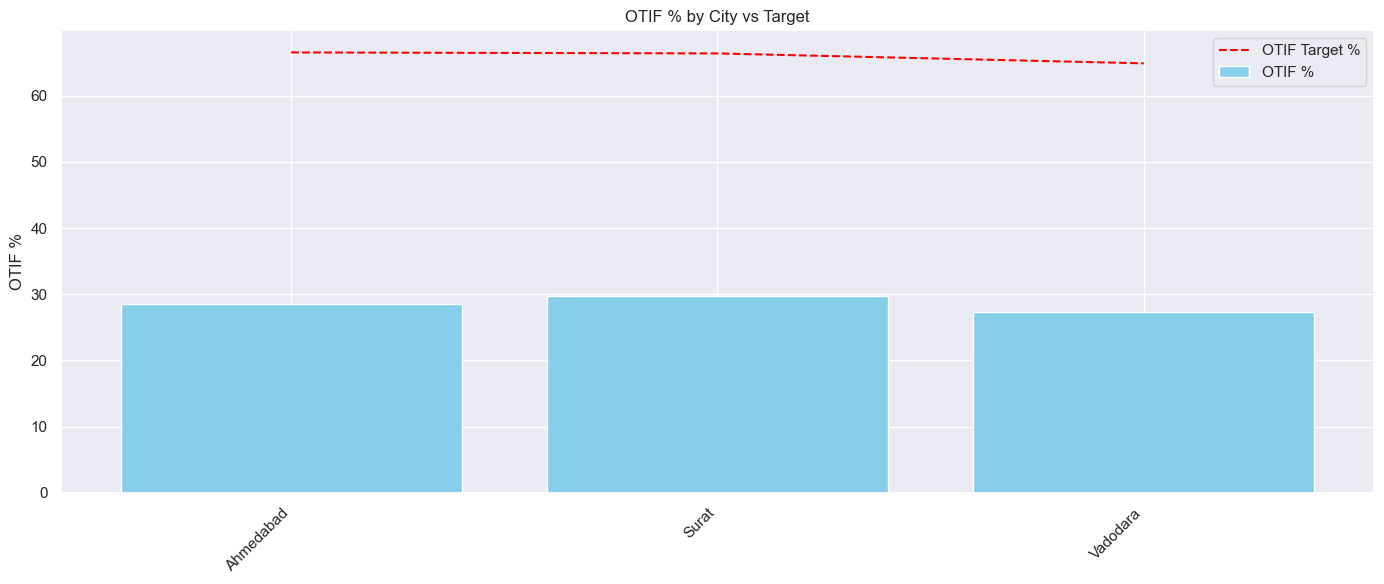

In [23]:
# Visualize city-level performance vs targets
plt.figure(figsize=(14, 6))
city_order = city_metrics.sort_values('OTIF %', ascending=False)['city']
plt.bar(city_metrics['city'], city_metrics['OTIF %'], label='OTIF %', color='skyblue')
plt.plot(city_metrics['city'], city_metrics['OTIF Target %'], '--', color='red', label='OTIF Target %')
plt.xticks(rotation=45, ha='right')
plt.ylabel('OTIF %')
plt.title('OTIF % by City vs Target')
plt.legend()
plt.tight_layout()
plt.show()

**We can see that some cities are preforming well to achieve their target as compare to other thus we have the area of improvement.**
**Surat City is Doing well as compare to others with 73% of on time delivery ,completing 76% on in full target**

In [24]:
# Calculate ON TIME %, IN FULL %, OTIF % by customer
customer_metrics = df6.groupby('customer_name').agg({
    'on_time': 'mean',
    'in_full': 'mean',
    'otif': 'mean',
    'ontime_target%': 'mean',
    'infull_target%': 'mean',
    'otif_target%': 'mean',
    'order_id': 'count'
}).reset_index()

for col in ['on_time', 'in_full', 'otif']:
    customer_metrics[col] = customer_metrics[col] * 100

customer_metrics = customer_metrics.rename(columns={
    'on_time': 'ON TIME %',
    'in_full': 'IN FULL %',
    'otif': 'OTIF %',
    'ontime_target%': 'ON TIME Target %',
    'infull_target%': 'IN FULL Target %',
    'otif_target%': 'OTIF Target %',
    'order_id': 'Order Count'
})

print(customer_metrics.head())


      customer_name  ON TIME %  IN FULL %     OTIF %  ON TIME Target %  \
0  Acclaimed Stores  26.891807  46.549927  12.716281         76.354805   
1      Atlas Stores  84.195933  48.675293  37.523105         87.996303   
2    Chiptec Stores  83.762008  49.643632  37.682058         89.025411   
3          Coolblue  26.812463  39.844218  11.773517         76.996405   
4        Elite Mart  84.744214  28.897686  21.650426         90.999391   

   IN FULL Target %  OTIF Target %  Order Count  
0         75.409006      57.743173         4797  
1         78.002465      68.499384         3246  
2         81.000000      72.025411         3227  
3         70.978430      54.480228         3338  
4         73.004872      66.503959         3284  


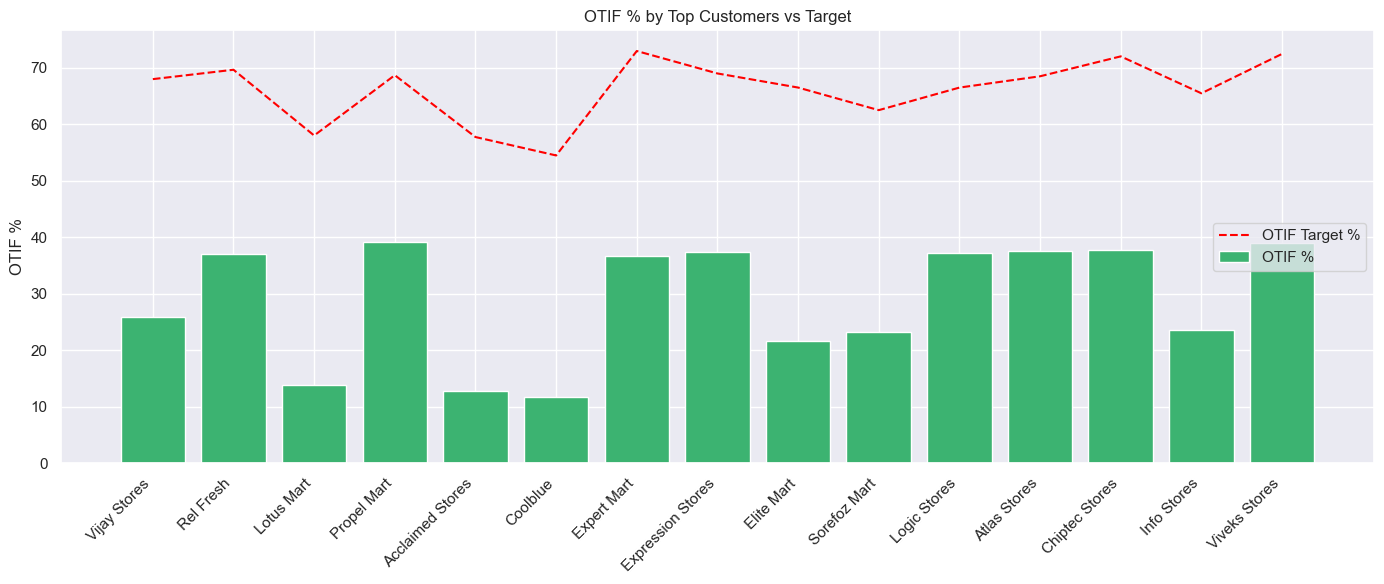

In [25]:
# Visualize customer-level OTIF % vs target for the top 15 customers by order count
top_customers = customer_metrics.sort_values('Order Count', ascending=False).head(15)
plt.figure(figsize=(14, 6))
plt.bar(top_customers['customer_name'], top_customers['OTIF %'], label='OTIF %', color='mediumseagreen')
plt.plot(top_customers['customer_name'], top_customers['OTIF Target %'], '--', color='red', label='OTIF Target %')
plt.xticks(rotation=45, ha='right')
plt.ylabel('OTIF %')
plt.title('OTIF % by Top Customers vs Target')
plt.legend()
plt.tight_layout()
plt.show()

**We can see that some customers are consistently below their OTIF targets, while others are much closer or even exceeding them.**

In [26]:
# Check unique values in 'In Full' to confirm its format
print(df6['In Full'].unique())

# Calculate overall LIFR and VOFR
lifr = df6['In Full'].sum() / df6.shape[0]
vofr = df6['delivery_qty'].sum() / df6['order_qty'].sum()

print('Overall Line Fill Rate (LIFR):', lifr)
print('Overall Volume Fill Rate (VOFR):', vofr)





[0 1]
Overall Line Fill Rate (LIFR): 0.6596083788706739
Overall Volume Fill Rate (VOFR): 0.9659059222446581


**The overall LIFR is about 66%, meaning about two-thirds of order lines are delivered in full.**

**The overall VOFR is about 97%, indicating that nearly all ordered volume is being delivered, even if some lines are not completely filled.**

In [27]:
# Calculate LIFR and VOFR by product
product_metrics = df6.groupby('product_name').agg({
    'In Full': 'sum',
    'order_id': 'count',
    'delivery_qty': 'sum',
    'order_qty': 'sum'
}).reset_index()

product_metrics['LIFR'] = product_metrics['In Full'] / product_metrics['order_id']
product_metrics['VOFR'] = product_metrics['delivery_qty'] / product_metrics['order_qty']

print(product_metrics[['product_name', 'LIFR', 'VOFR']].head())

      product_name      LIFR      VOFR
0  AM Biscuits 250  0.651601  0.965790
1  AM Biscuits 500  0.661033  0.964911
2  AM Biscuits 750  0.680494  0.968528
3    AM Butter 100  0.666562  0.965889
4    AM Butter 250  0.635200  0.963610


**This table shows that most products have a LIFR in the mid-60% range, but their VOFR is much higher, close to 97%.**

**This suggests that while some lines are not fully delivered, the shortfall per line is relatively small.**

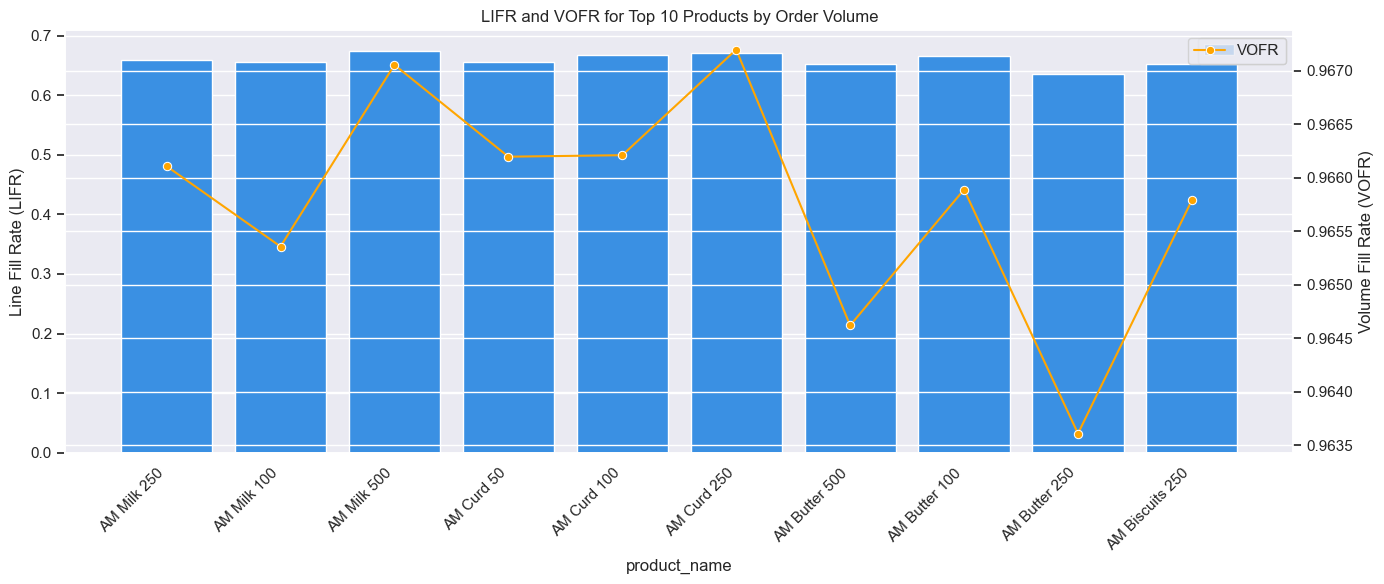

In [28]:
# Visualize LIFR and VOFR for top 10 products by order volume
top_products = product_metrics.sort_values('order_qty', ascending=False).head(10)
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(14, 6))
sns.barplot(x='product_name', y='LIFR', data=top_products, color='dodgerblue', label='LIFR', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='product_name', y='VOFR', data=top_products, color='orange', marker='o', label='VOFR', ax=ax2)

ax1.set_ylabel('Line Fill Rate (LIFR)')
ax2.set_ylabel('Volume Fill Rate (VOFR)')
ax1.set_xticklabels(top_products['product_name'], rotation=45, ha='right')
plt.title('LIFR and VOFR for Top 10 Products by Order Volume')
fig.tight_layout()
plt.show()

**This table shows that most products have a LIFR in the mid-60% range, but their VOFR is much higher, close to 97%.**

**This suggests that while some lines are not fully delivered, the shortfall per line is relatively small.**

Top 5 products by order volume:
   product_name  order_qty      LIFR      VOFR
13  AM Milk 250    1279132  0.659055  0.966107
12  AM Milk 100    1276190  0.655465  0.965357
14  AM Milk 500    1254422  0.675056  0.967054
8    AM Curd 50    1119256  0.655475  0.966196
6   AM Curd 100    1105336  0.667296  0.966210


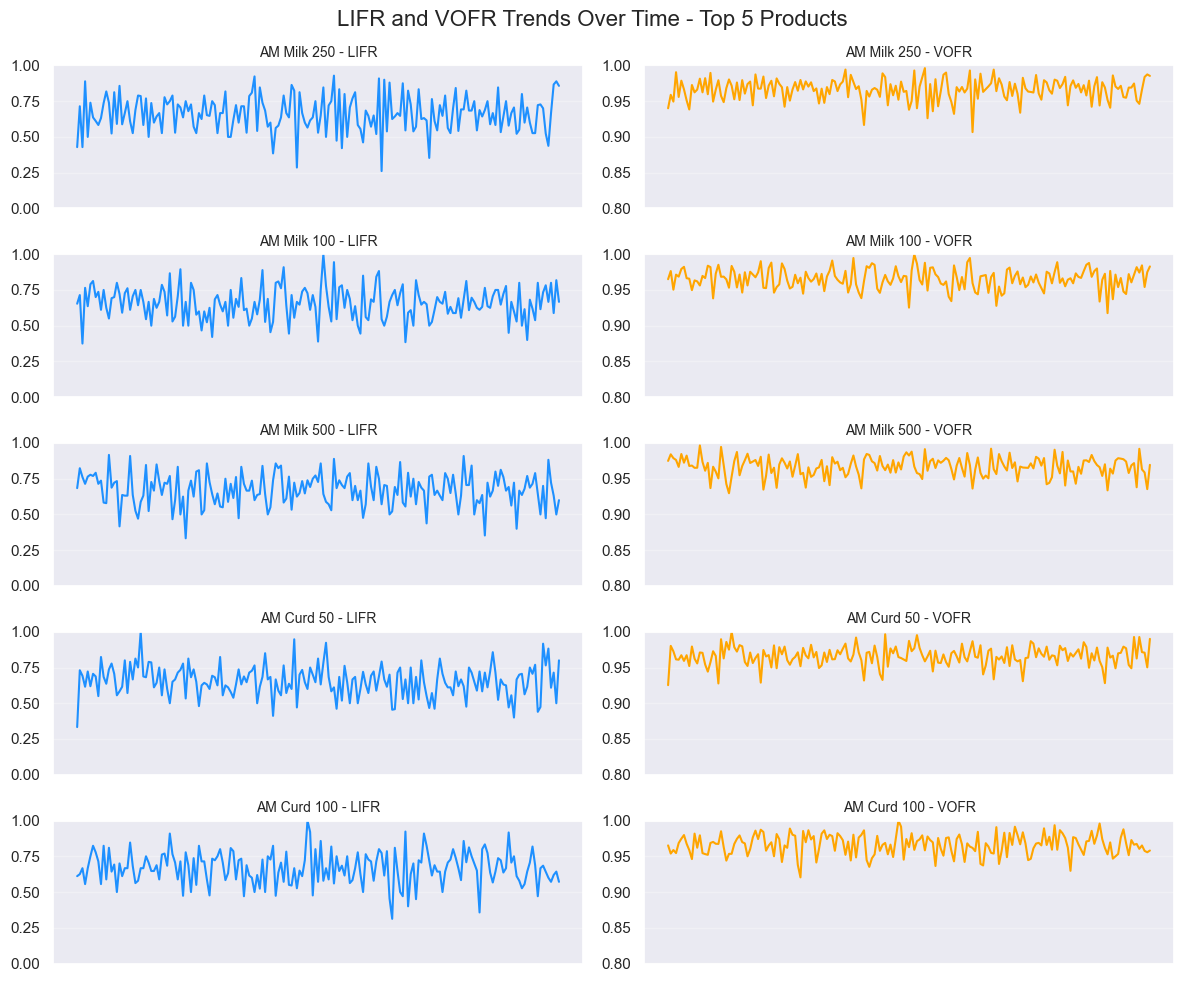

In [29]:
# Get top 5 products by order volume
top_5_products = product_metrics.sort_values('order_qty', ascending=False).head(5)
print("Top 5 products by order volume:")
print(top_5_products[['product_name', 'order_qty', 'LIFR', 'VOFR']])


# Create sparklines for each of the top 5 products
fig, axes = plt.subplots(5, 2, figsize=(12, 10))
fig.suptitle('LIFR and VOFR Trends Over Time - Top 5 Products', fontsize=16)

for i, product in enumerate(top_5_products['product_name']):
    # Filter data for this product
    prod_df = df6[df6['product_name'] == product].copy()
    
    # Group by date and calculate daily LIFR and VOFR
    daily_metrics = prod_df.groupby('order_placement_date').agg({
        'In Full': 'sum',
        'order_id': 'count',
        'delivery_qty': 'sum',
        'order_qty': 'sum'
    }).reset_index()
    
    daily_metrics['LIFR'] = daily_metrics['In Full'] / daily_metrics['order_id']
    daily_metrics['VOFR'] = daily_metrics['delivery_qty'] / daily_metrics['order_qty']
    
    # Sort by date
    daily_metrics = daily_metrics.sort_values('order_placement_date')
    
    # Plot LIFR sparkline
    axes[i, 0].plot(daily_metrics['order_placement_date'], daily_metrics['LIFR'], 
                    color='dodgerblue', linewidth=1.5)
    axes[i, 0].set_title(f'{product} - LIFR', fontsize=10)
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].grid(True, alpha=0.3)
    
    # Plot VOFR sparkline
    axes[i, 1].plot(daily_metrics['order_placement_date'], daily_metrics['VOFR'], 
                    color='orange', linewidth=1.5)
    axes[i, 1].set_title(f'{product} - VOFR', fontsize=10)
    axes[i, 1].set_ylim(0.8, 1.0)
    axes[i, 1].grid(True, alpha=0.3)
    
    # Remove x-axis labels for cleaner look (sparkline style)
    axes[i, 0].set_xticks([])
    axes[i, 1].set_xticks([])

plt.tight_layout()
plt.show()

**LIFR patterns: Most products show fluctuating LIFR performance over time, with values typically ranging between 40-80%. You can see periods of better and worse line fill performance.**

**VOFR patterns: Volume fill rates are much more stable and consistently high (80-100%), showing that even when lines aren't completely filled, the volume shortfall is minimal.**

**Product comparison: AM Milk 500 appears to have the best overall LIFR performance among the top products, while AM Milk 100 shows more volatility.**

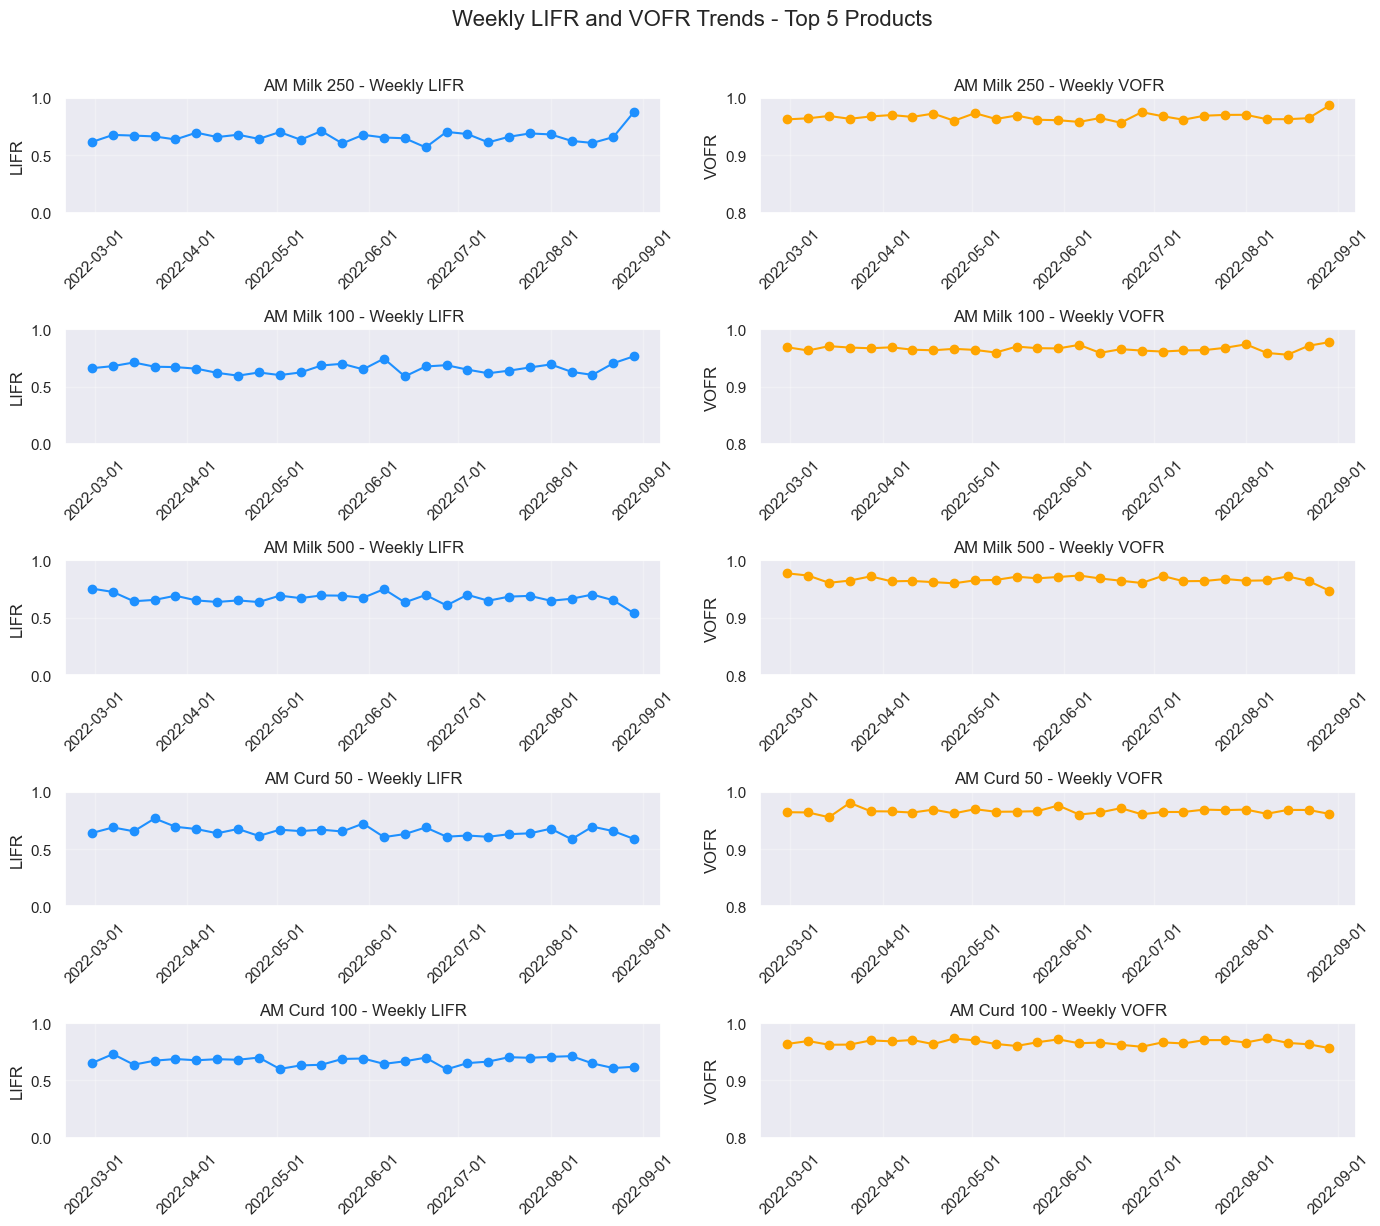

In [30]:

df7= df6.copy()

# Add a week column
df7['order_week'] = df7['order_placement_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Get top 5 products by order volume
top_5_products = product_metrics.sort_values('order_qty', ascending=False).head(5)['product_name']

# Set up the plot
grid_rows = len(top_5_products)
fig, axes = plt.subplots(grid_rows, 2, figsize=(14, 2.5 * grid_rows))
fig.suptitle('Weekly LIFR and VOFR Trends - Top 5 Products', fontsize=16)

for i, product in enumerate(top_5_products):
    prod_df = df7[df7['product_name'] == product]
    weekly = prod_df.groupby('order_week').agg({
        'In Full': 'sum',
        'order_id': 'count',
        'delivery_qty': 'sum',
        'order_qty': 'sum'
    }).reset_index()
    weekly['LIFR'] = weekly['In Full'] / weekly['order_id']
    weekly['VOFR'] = weekly['delivery_qty'] / weekly['order_qty']
    
    # Plot LIFR
    axes[i, 0].plot(weekly['order_week'], weekly['LIFR'], color='dodgerblue', marker='o')
    axes[i, 0].set_title(product + ' - Weekly LIFR')
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].grid(True, alpha=0.3)
    axes[i, 0].set_ylabel('LIFR')
    
    # Plot VOFR
    axes[i, 1].plot(weekly['order_week'], weekly['VOFR'], color='orange', marker='o')
    axes[i, 1].set_title(product + ' - Weekly VOFR')
    axes[i, 1].set_ylim(0.8, 1.0)
    axes[i, 1].grid(True, alpha=0.3)
    axes[i, 1].set_ylabel('VOFR')
    
    # Clean up x-axis labels for clarity
    for ax in axes[i]:
        ax.set_xticks(ax.get_xticks()[::max(1, len(ax.get_xticks()) // 8)])
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**The weekly aggregation smooths out the daily volatility and reveals clearer patterns.**

Available categories:
['Dairy' 'Food' 'beverages']
LIFR and VOFR by Category:
    category      LIFR      VOFR
0      Dairy  0.659466  0.965880
1       Food  0.664325  0.966406
2  beverages  0.655428  0.965430


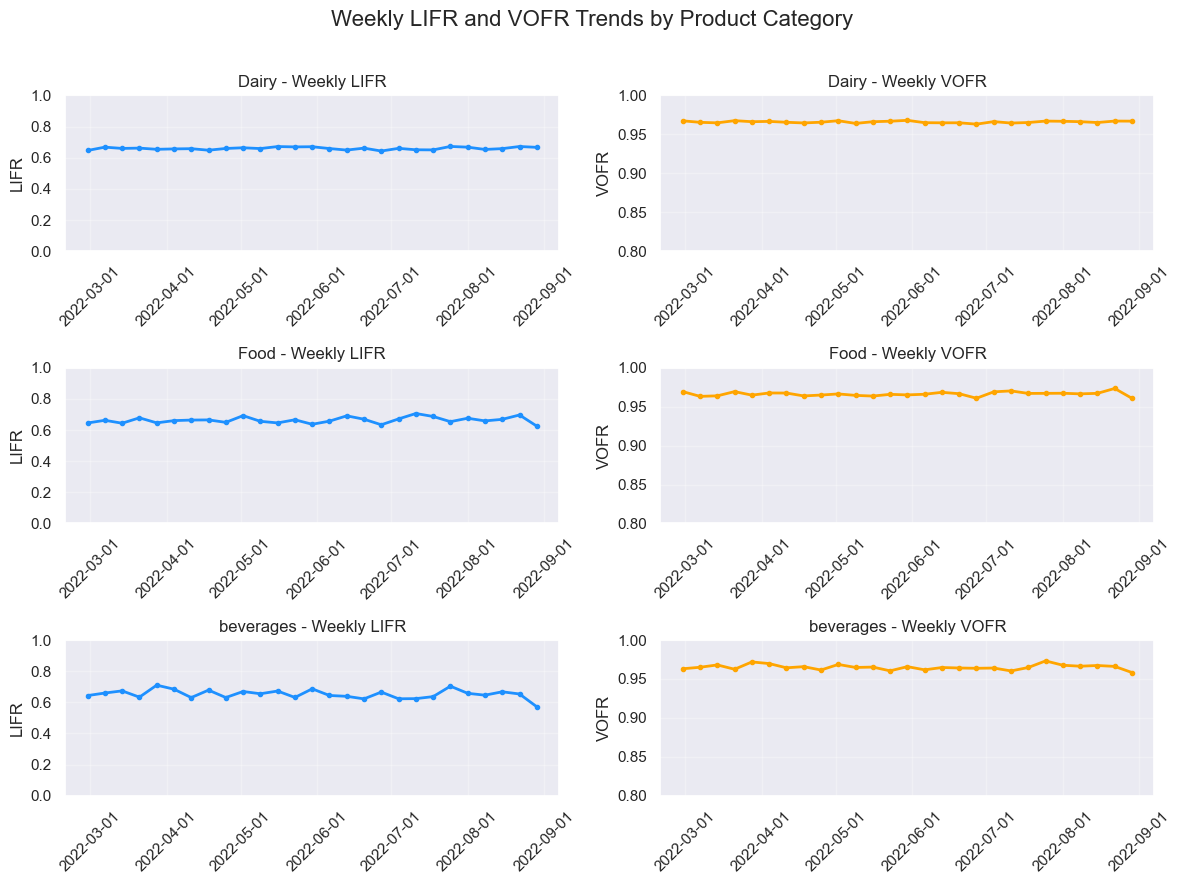

In [31]:
# Create sparklines by product category
categories = df7['category'].unique()
print("Available categories:")
print(categories)

# Get metrics by category
category_metrics = df7.groupby('category').agg({
    'In Full': 'sum',
    'order_id': 'count',
    'delivery_qty': 'sum',
    'order_qty': 'sum'
}).reset_index()

category_metrics['LIFR'] = category_metrics['In Full'] / category_metrics['order_id']
category_metrics['VOFR'] = category_metrics['delivery_qty'] / category_metrics['order_qty']

print("\
LIFR and VOFR by Category:")
print(category_metrics[['category', 'LIFR', 'VOFR']])

# Create sparklines for each category
fig, axes = plt.subplots(len(categories), 2, figsize=(12, 3 * len(categories)))
fig.suptitle('Weekly LIFR and VOFR Trends by Product Category', fontsize=16)

for i, category in enumerate(categories):
    cat_df = df7[df7['category'] == category]
    weekly_cat = cat_df.groupby('order_week').agg({
        'In Full': 'sum',
        'order_id': 'count',
        'delivery_qty': 'sum',
        'order_qty': 'sum'
    }).reset_index()
    weekly_cat['LIFR'] = weekly_cat['In Full'] / weekly_cat['order_id']
    weekly_cat['VOFR'] = weekly_cat['delivery_qty'] / weekly_cat['order_qty']
    
    # Plot LIFR
    axes[i, 0].plot(weekly_cat['order_week'], weekly_cat['LIFR'], 
                    color='dodgerblue', linewidth=2, marker='o', markersize=3)
    axes[i, 0].set_title(category + ' - Weekly LIFR')
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].grid(True, alpha=0.3)
    axes[i, 0].set_ylabel('LIFR')
    
    # Plot VOFR
    axes[i, 1].plot(weekly_cat['order_week'], weekly_cat['VOFR'], 
                    color='orange', linewidth=2, marker='o', markersize=3)
    axes[i, 1].set_title(category + ' - Weekly VOFR')
    axes[i, 1].set_ylim(0.8, 1.0)
    axes[i, 1].grid(True, alpha=0.3)
    axes[i, 1].set_ylabel('VOFR')
    
    # Clean up x-axis
    for ax in axes[i]:
        ax.set_xticks(ax.get_xticks()[::max(1, len(ax.get_xticks()) // 6)])
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Food category has the highest LIFR at 66.4%, slightly outperforming Dairy and Beverages**

**VOFR is consistent across all categories (96.5-96.6%), showing volume delivery is reliable regardless of category**

**Trend patterns show that all categories follow similar weekly patterns, suggesting supply chain challenges affect all product types similarly**

        city order_week  order_qty  delivery_qty  order_id  on_time  in_full  \
0  Ahmedabad 2022-02-28     153127        148350       660      470      319   
1  Ahmedabad 2022-03-07     169381        163857       750      511      367   
2  Ahmedabad 2022-03-14     180910        174885       786      567      345   
3  Ahmedabad 2022-03-21     183459        177945       778      563      322   
4  Ahmedabad 2022-03-28     168276        162884       728      508      324   

   otif      LIFR      VOFR      OTIF  
0   215  0.483333  0.968804  0.325758  
1   233  0.489333  0.967387  0.310667  
2   214  0.438931  0.966696  0.272265  
3   197  0.413882  0.969944  0.253213  
4   213  0.445055  0.967957  0.292582  


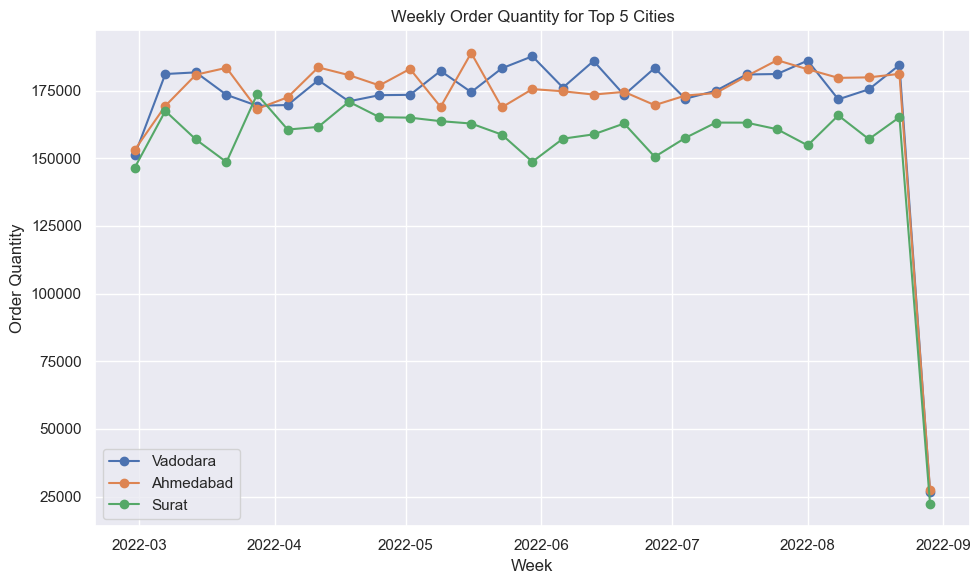

Regional sales data (top 5 cities) visualized and table previewed.


In [32]:
# Aggregate by city and week
regional_weekly = df7.copy()
regional_weekly['order_week'] = regional_weekly['order_placement_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by city and week
city_weekly = regional_weekly.groupby(['city', 'order_week']).agg({
    'order_qty': 'sum',
    'delivery_qty': 'sum',
    'order_id': 'count',
    'on_time': 'sum',
    'in_full': 'sum',
    'otif': 'sum'
}).reset_index()

# Calculate LIFR, VOFR, OTIF for each city-week
city_weekly['LIFR'] = city_weekly['in_full'] / city_weekly['order_id']
city_weekly['VOFR'] = city_weekly['delivery_qty'] / city_weekly['order_qty']
city_weekly['OTIF'] = city_weekly['otif'] / city_weekly['order_id']

# Show the head of the city_weekly data and a chart of top 5 cities by total sales
print(city_weekly.head())

# Top 5 cities by total order_qty
top_cities = city_weekly.groupby('city')['order_qty'].sum().sort_values(ascending=False).head(5).index.tolist()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
for city in top_cities:
    data = city_weekly[city_weekly['city'] == city]
    plt.plot(data['order_week'], data['order_qty'], marker='o', label=city)
plt.title('Weekly Order Quantity for Top 5 Cities')
plt.xlabel('Week')
plt.ylabel('Order Quantity')
plt.legend()
plt.tight_layout()
plt.show()

print('Regional sales data (top 5 cities) visualized and table previewed.')

In [33]:
# Create summary statistics for regional performance
regional_summary = city_weekly.groupby('city').agg({
    'order_qty': ['sum', 'mean'],
    'delivery_qty': ['sum', 'mean'],
    'LIFR': 'mean',
    'VOFR': 'mean',
    'OTIF': 'mean',
    'order_id': 'sum'
}).round(3)

regional_summary.columns = ['Total_Orders', 'Avg_Weekly_Orders', 'Total_Delivered', 'Avg_Weekly_Delivered', 
                           'Avg_LIFR', 'Avg_VOFR', 'Avg_OTIF', 'Total_Order_Count']

regional_summary = regional_summary.sort_values('Total_Orders', ascending=False)

print("\
Regional Performance Summary:")
print(regional_summary.head(10))

# Show top performing cities by OTIF
print("\
Top 5 Cities by OTIF Performance:")
top_otif_cities = regional_summary.sort_values('Avg_OTIF', ascending=False).head(5)[['Avg_OTIF', 'Avg_LIFR', 'Avg_VOFR', 'Total_Orders']]
print(top_otif_cities)

Regional Performance Summary:
           Total_Orders  Avg_Weekly_Orders  Total_Delivered  \
city                                                          
Vadodara        4624171         171265.593          4456091   
Ahmedabad       4612298         170825.852          4462984   
Surat           4190467         155202.481          4050082   

           Avg_Weekly_Delivered  Avg_LIFR  Avg_VOFR  Avg_OTIF  \
city                                                            
Vadodara             165040.407     0.427     0.963     0.272   
Ahmedabad            165295.704     0.452     0.968     0.286   
Surat                150003.037     0.437     0.966     0.298   

           Total_Order_Count  
city                          
Vadodara               19578  
Ahmedabad              19676  
Surat                  17842  
Top 5 Cities by OTIF Performance:
           Avg_OTIF  Avg_LIFR  Avg_VOFR  Total_Orders
city                                                 
Surat         0.298     0.437  

In [34]:
 #Get overall delivery rates by city
city_delivery_rates = df7.groupby('city').agg({
    'order_qty': 'sum',
    'delivery_qty': 'sum',
    'order_id': 'count'
}).reset_index()

city_delivery_rates['delivery_rate'] = city_delivery_rates['delivery_qty'] / city_delivery_rates['order_qty']
city_delivery_rates['delivery_rate_pct'] = city_delivery_rates['delivery_rate'] * 100

# Sort by lowest delivery rates
lowest_delivery_cities = city_delivery_rates.sort_values('delivery_rate').reset_index(drop=True)

print("Cities with Lowest Delivery Rates:")
print(lowest_delivery_cities[['city', 'delivery_rate_pct', 'order_qty', 'delivery_qty', 'order_id']].head(10))

# Calculate weekly delivery rates to see trends
weekly_city_delivery = city_weekly.copy()
weekly_city_delivery['delivery_rate'] = weekly_city_delivery['delivery_qty'] / weekly_city_delivery['order_qty']
weekly_city_delivery['delivery_rate_pct'] = weekly_city_delivery['delivery_rate'] * 100

# Find cities with consistently low delivery rates (below 95%)
low_performing_cities = weekly_city_delivery.groupby('city')['delivery_rate'].agg(['mean', 'std', 'min', 'max']).reset_index()
low_performing_cities.columns = ['city', 'avg_delivery_rate', 'std_delivery_rate', 'min_delivery_rate', 'max_delivery_rate']
low_performing_cities['avg_delivery_rate_pct'] = low_performing_cities['avg_delivery_rate'] * 100

# Filter cities with average delivery rate below 95%
problematic_cities = low_performing_cities[low_performing_cities['avg_delivery_rate'] < 0.95].sort_values('avg_delivery_rate')

print("\
Cities with Average Delivery Rate Below 95%:")
print(problematic_cities[['city', 'avg_delivery_rate_pct', 'min_delivery_rate', 'max_delivery_rate']].round(2))

Cities with Lowest Delivery Rates:
        city  delivery_rate_pct  order_qty  delivery_qty  order_id
0   Vadodara          96.365186    4624171       4456091     19578
1      Surat          96.649896    4190467       4050082     17842
2  Ahmedabad          96.762698    4612298       4462984     19676
Cities with Average Delivery Rate Below 95%:
Empty DataFrame
Columns: [city, avg_delivery_rate_pct, min_delivery_rate, max_delivery_rate]
Index: []


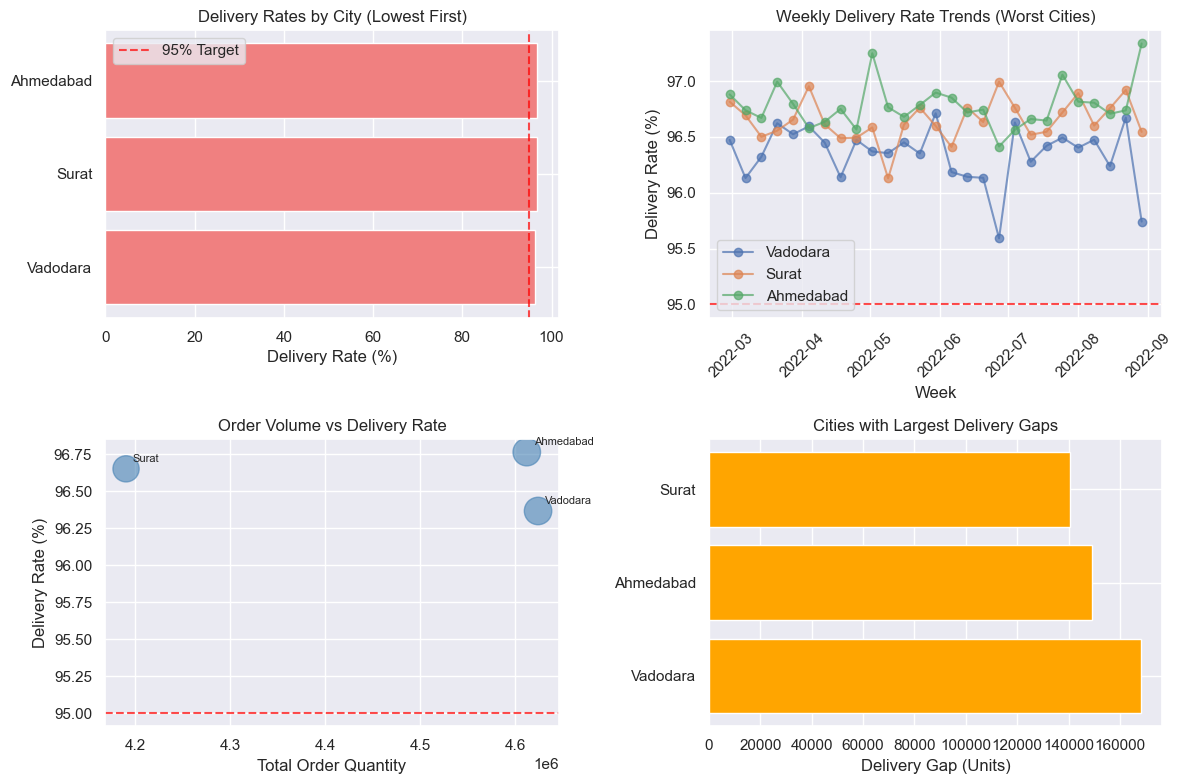

Delivery Performance Analysis:
Overall Delivery Rate: 96.59%
Total Units Ordered: 13,426,936
Total Units Delivered: 12,969,157
Total Delivery Shortfall: 457,779 units
Worst Performing Cities (Delivery Rate):
Vadodara: 96.37% (Shortfall: 168,080 units)
Surat: 96.65% (Shortfall: 140,385 units)
Ahmedabad: 96.76% (Shortfall: 149,314 units)


In [35]:
#Create visualization of delivery rates by city
plt.figure(figsize=(12, 8))

# Plot 1: Overall delivery rates by city
plt.subplot(2, 2, 1)
city_delivery_sorted = lowest_delivery_cities.head(10)
plt.barh(city_delivery_sorted['city'], city_delivery_sorted['delivery_rate_pct'], color='lightcoral')
plt.xlabel('Delivery Rate (%)')
plt.title('Delivery Rates by City (Lowest First)')
plt.axvline(x=95, color='red', linestyle='--', alpha=0.7, label='95% Target')
plt.legend()

# Plot 2: Weekly delivery rate trends for worst performing cities
plt.subplot(2, 2, 2)
worst_cities = lowest_delivery_cities.head(3)['city'].tolist()
for city in worst_cities:
    city_data = weekly_city_delivery[weekly_city_delivery['city'] == city]
    plt.plot(city_data['order_week'], city_data['delivery_rate_pct'], marker='o', label=city, alpha=0.7)

plt.xlabel('Week')
plt.ylabel('Delivery Rate (%)')
plt.title('Weekly Delivery Rate Trends (Worst Cities)')
plt.xticks(rotation=45)
plt.legend()
plt.axhline(y=95, color='red', linestyle='--', alpha=0.7)

# Plot 3: Order volume vs delivery rate scatter
plt.subplot(2, 2, 3)
plt.scatter(city_delivery_rates['order_qty'], city_delivery_rates['delivery_rate_pct'], 
           s=city_delivery_rates['order_id']/50, alpha=0.6, color='steelblue')
plt.xlabel('Total Order Quantity')
plt.ylabel('Delivery Rate (%)')
plt.title('Order Volume vs Delivery Rate')
plt.axhline(y=95, color='red', linestyle='--', alpha=0.7)

# Add city labels for lowest performers
for idx, row in lowest_delivery_cities.head(5).iterrows():
    plt.annotate(row['city'], (row['order_qty'], row['delivery_rate_pct']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 4: Delivery gap analysis
plt.subplot(2, 2, 4)
city_delivery_rates['delivery_gap'] = city_delivery_rates['order_qty'] - city_delivery_rates['delivery_qty']
worst_gaps = city_delivery_rates.nlargest(10, 'delivery_gap')
plt.barh(worst_gaps['city'], worst_gaps['delivery_gap'], color='orange')
plt.xlabel('Delivery Gap (Units)')
plt.title('Cities with Largest Delivery Gaps')

plt.tight_layout()
plt.show()

# Calculate financial impact of delivery shortfalls
print("\
Delivery Performance Analysis:")
print("=" * 50)

total_ordered = city_delivery_rates['order_qty'].sum()
total_delivered = city_delivery_rates['delivery_qty'].sum()
overall_delivery_rate = (total_delivered / total_ordered) * 100

print(f"Overall Delivery Rate: {overall_delivery_rate:.2f}%")
print(f"Total Units Ordered: {total_ordered:,}")
print(f"Total Units Delivered: {total_delivered:,}")
print(f"Total Delivery Shortfall: {total_ordered - total_delivered:,} units")

print("\
Worst Performing Cities (Delivery Rate):")
for idx, row in lowest_delivery_cities.head(5).iterrows():
    shortfall = row['order_qty'] - row['delivery_qty']
    print(f"{row['city']}: {row['delivery_rate_pct']:.2f}% (Shortfall: {shortfall:,} units)")

**the cities with the lowest delivery rates. Vadodara, Surat, and Ahmedabad have the lowest delivery rates, all just above 96%. This means that for every 100 units ordered, about 3–4 units are not delivered.**

In [36]:
# First, let's examine the delivery delay patterns
df7['agreed_delivery_date'] = pd.to_datetime(df7['agreed_delivery_date'])
df7['actual_delivery_date'] = pd.to_datetime(df7['actual_delivery_date'])

# Calculate delivery delay in days
df7['delivery_delay_days'] = (df7['actual_delivery_date'] - df7['agreed_delivery_date']).dt.days

# Identify delayed orders (positive delay days)
delayed_orders = df7[df7['delivery_delay_days'] > 0].copy()
on_time_orders = df7[df7['delivery_delay_days'] <= 0].copy()

print("Delivery Delay Analysis:")
print("=" * 40)
print(f"Total Orders: {len(df7):,}")
print(f"Delayed Orders: {len(delayed_orders):,} ({len(delayed_orders)/len(df7)*100:.1f}%)")
print(f"On-time/Early Orders: {len(on_time_orders):,} ({len(on_time_orders)/len(df7)*100:.1f}%)")
print(f"Average Delay (all orders): {df7['delivery_delay_days'].mean():.2f} days")
print(f"Average Delay (delayed orders only): {delayed_orders['delivery_delay_days'].mean():.2f} days")
print(f"Maximum Delay: {df7['delivery_delay_days'].max()} days")

# Analyze delay patterns by different dimensions
print("\
Delay Analysis by Category:")
delay_by_category = df7.groupby('category').agg({
    'delivery_delay_days': ['mean', 'median', 'std', 'count'],
    'order_id': 'count'
}).round(2)
delay_by_category.columns = ['avg_delay', 'median_delay', 'std_delay', 'delay_count', 'total_orders']
delay_by_category['delay_rate'] = (df7[df7['delivery_delay_days'] > 0].groupby('category').size() / 
                                  df7.groupby('category').size() * 100).round(1)
delay_by_category = delay_by_category.sort_values('avg_delay', ascending=False)
print(delay_by_category)

Delivery Delay Analysis:
Total Orders: 57,096
Delayed Orders: 16,491 (28.9%)
On-time/Early Orders: 40,605 (71.1%)
Average Delay (all orders): 0.42 days
Average Delay (delayed orders only): 1.69 days
Maximum Delay: 3 days
Delay Analysis by Category:
           avg_delay  median_delay  std_delay  delay_count  total_orders  \
category                                                                   
Dairy           0.43           0.0       0.94        38096         38096   
beverages       0.42           0.0       0.92         9461          9461   
Food            0.41           0.0       0.92         9539          9539   

           delay_rate  
category               
Dairy            29.2  
beverages        28.6  
Food             27.9  


**About 29% of all orders are delayed, with an average delay of 1.69 days for those that are late. The maximum observed delay is 3 days.**

In [37]:
# Analyze delay patterns by city and customer
print("Delay Analysis by City:")
delay_by_city = df7.groupby('city').agg({
    'delivery_delay_days': ['mean', 'count'],
    'order_id': 'count'
}).round(2)
delay_by_city.columns = ['avg_delay', 'delay_count', 'total_orders']

# Calculate delay rate by city
delayed_by_city = df7[df7['delivery_delay_days'] > 0].groupby('city').size()
total_by_city = df7.groupby('city').size()
delay_by_city['delay_rate'] = (delayed_by_city / total_by_city * 100).round(1)
delay_by_city['delayed_orders'] = delayed_by_city.fillna(0).astype(int)

delay_by_city = delay_by_city.sort_values('delay_rate', ascending=False)
print(delay_by_city.head(10))

print("\
Delay Analysis by Product:")
delay_by_product = df7.groupby('product_name').agg({
    'delivery_delay_days': ['mean', 'count'],
    'order_id': 'count'
}).round(2)
delay_by_product.columns = ['avg_delay', 'delay_count', 'total_orders']

# Calculate delay rate by product
delayed_by_product = df7[df7['delivery_delay_days'] > 0].groupby('product_name').size()
total_by_product = df7.groupby('product_name').size()
delay_by_product['delay_rate'] = (delayed_by_product / total_by_product * 100).round(1)

delay_by_product = delay_by_product.sort_values('delay_rate', ascending=False)
print(delay_by_product.head(10))

# Analyze delay patterns by week
print("\
Delay Analysis by Week:")
delay_by_week = df7.groupby('agreed_week_no').agg({
    'delivery_delay_days': ['mean', 'count'],
    'order_id': 'count'
}).round(2)
delay_by_week.columns = ['avg_delay', 'delay_count', 'total_orders']

delayed_by_week = df7[df7['delivery_delay_days'] > 0].groupby('agreed_week_no').size()
total_by_week = df7.groupby('agreed_week_no').size()
delay_by_week['delay_rate'] = (delayed_by_week / total_by_week * 100).round(1)

delay_by_week = delay_by_week.sort_values('delay_rate', ascending=False)
print(delay_by_week.head(10))

Delay Analysis by City:
           avg_delay  delay_count  total_orders  delay_rate  delayed_orders
city                                                                       
Vadodara        0.44        19578         19578        30.1            5891
Ahmedabad       0.45        19676         19676        30.0            5902
Surat           0.38        17842         17842        26.3            4698
Delay Analysis by Product:
               avg_delay  delay_count  total_orders  delay_rate
product_name                                                   
AM Ghee 250         0.44         3200          3200        30.4
AM Ghee 150         0.44         3209          3209        30.1
AM Ghee 100         0.45         3098          3098        30.0
AM Butter 500       0.44         3272          3272        29.6
AM Butter 100       0.43         3170          3170        29.2
AM Milk 250         0.44         3197          3197        29.2
AM Tea 250          0.42         3143          3143      

**Vadodara and Ahmedabad have the highest delay rates, both around 30%, with Surat slightly lower**

**Certain items like AM Ghee 250 and AM Ghee 150 have the highest delay rates, over 30%**

**Delays also vary by week, with some weeks (like W 15 and W 24) experiencing higher delay rates**


In [38]:
# Analyze order quantity vs delivery patterns to identify capacity issues
print("Order Quantity vs Delivery Analysis:")
print("=" * 45)

# Analyze relationship between order size and delivery performance
df7['order_size_category'] = pd.cut(df7['order_qty'], 
                                               bins=[0, 100, 200, 300, 500, float('inf')], 
                                               labels=['Small (≤100)', 'Medium (101-200)', 'Large (201-300)', 
                                                      'Very Large (301-500)', 'Huge (>500)'])

order_size_analysis = df7.groupby('order_size_category').agg({
    'delivery_delay_days': 'mean',
    'order_qty': 'mean',
    'delivery_qty': 'mean',
    'order_id': 'count'
}).round(2)

order_size_analysis['fill_rate'] = (order_size_analysis['delivery_qty'] / order_size_analysis['order_qty'] * 100).round(1)
order_size_analysis['delay_rate'] = (df7[df7['delivery_delay_days'] > 0].groupby('order_size_category').size() / 
                                   df7.groupby('order_size_category').size() * 100).round(1)

print(order_size_analysis)

# Analyze customer-specific delay patterns
print("\
Top 10 Customers with Highest Delay Rates:")
customer_delay = df7.groupby('customer_name').agg({
    'delivery_delay_days': 'mean',
    'order_id': 'count'
}).round(2)

delayed_by_customer = df7[df7['delivery_delay_days'] > 0].groupby('customer_name').size()
total_by_customer = df7.groupby('customer_name').size()
customer_delay['delay_rate'] = (delayed_by_customer / total_by_customer * 100).round(1)
customer_delay = customer_delay[customer_delay['order_id'] >= 50]  # Filter for customers with at least 50 orders
customer_delay = customer_delay.sort_values('delay_rate', ascending=False)

print(customer_delay.head(10))

# Analyze seasonal patterns
print("\
Delay Analysis by Month:")
df7['order_month'] = df7['agreed_delivery_date'].dt.month
monthly_delay = df7.groupby('order_month').agg({
    'delivery_delay_days': 'mean',
    'order_id': 'count'
}).round(2)

delayed_by_month = df7[df7['delivery_delay_days'] > 0].groupby('order_month').size()
total_by_month = df7.groupby('order_month').size()
monthly_delay['delay_rate'] = (delayed_by_month / total_by_month * 100).round(1)

print(monthly_delay)

Order Quantity vs Delivery Analysis:
                      delivery_delay_days  order_qty  delivery_qty  order_id  \
order_size_category                                                            
Small (≤100)                         0.44      64.05         61.88     12768   
Medium (101-200)                     0.41     151.00        145.83     14996   
Large (201-300)                      0.43     241.76        233.58      8848   
Very Large (301-500)                 0.42     400.59        386.91     20484   
Huge (>500)                           NaN        NaN           NaN         0   

                      fill_rate  delay_rate  
order_size_category                          
Small (≤100)               96.6        30.1  
Medium (101-200)           96.6        28.2  
Large (201-300)            96.6        28.5  
Very Large (301-500)       96.6        28.8  
Huge (>500)                 NaN         NaN  
Top 10 Customers with Highest Delay Rates:
                   delivery_delay_day

**Both small and large orders have similar delay rates, but the fill rate remains consistent across sizes**

**Some customers experience much higher delay rates than others. Lotus Mart and Coolblue have delay rates above 70%, which is much higher than the average.**

**There are some seasonal patterns, with delay rates fluctuating slightly by month but generally staying around 28–29%**

In [39]:
# saving the dataframe
df7.to_csv(r'C:\\Users\\LENOVO\\Downloads\\Supply_chain(1).csv')